Compute the performance of MAB methods of pruning Multiple neurons at one time

MAP for choosing multi arms at one time

In [5]:
import numpy as np
import time
import sys
from numpy import *
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
#plt.rcParams['figure.figsize'] = (15, 6)

# Load Bokeh

In [6]:
from bokeh.layouts import row, gridplot
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Legend
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
output_notebook()

Loading BokehJS ...

# Load the data

In [7]:
X_train = np.load('./adult/X_train.npy')
y_train = np.load('./adult/y_train.npy')
X_test = np.load('./adult/X_test.npy')
y_test = np.load('./adult/y_test.npy')
X_deploy = np.load('./adult/X_deploy.npy')
y_deploy = np.load('./adult/y_deploy.npy')
print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 17712
Number of validation examples 4428
Number of testing examples 3908


In [8]:
exec(open("core.py").read())  # pyhton 3x

## Run Thompson Sampling pruning Algorithm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


Test fraction correct (NN-Score) = 0.35
Test fraction correct (NN-Accuracy) = 0.84
The time for running this method is 0.8135659694671631 seconds 
Finsh playing start pruining:
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.83
Test after pruning= 0.81
Test after pruning= 0.82
Test after pruning= 0.81
Test after pruning= 0.82
Test after pruning= 0.81
Test after pruning= 0.80
Test after pruning= 0.79
Test after pruning= 0.78
Test after pruning= 0.77
Test after pruning= 0.77
Test after pruning= 0.77
Test after pruning= 0.76
Test after pruning= 0.75
Test after pruning= 0.75
Test after pruning= 0.74
Test after pruning= 0.74
Test after pruning= 0.74
Test after pruning= 0.74
Test after pruning= 0.74
Test after pruning= 0.7

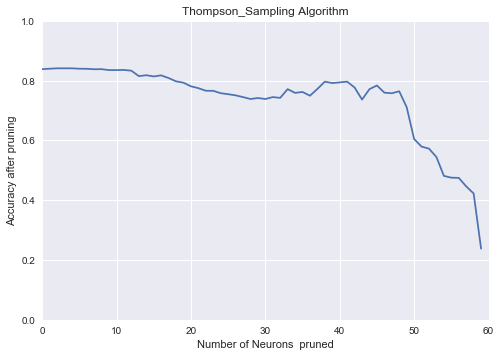

In [9]:
algo = Thompson_Sampling([], [])
Alg_name = 'Thompson_Sampling Algorithm'
path = './Thompson_Sampling/'
sys.path.append("./Thompson_Sampling")
exec(open("mnist_cnnFORTESTING.py").read())

## Run UCB1 pruning Algorithm

Test fraction correct (NN-Score) = 0.35
Test fraction correct (NN-Accuracy) = 0.84
The time for running this method is 0.8126180171966553 seconds 
Finsh playing start pruining:
Test after pruning= 0.83
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.84
Test after pruning= 0.83
Test after pruning= 0.83
Test after pruning= 0.83
Test after pruning= 0.82
Test after pruning= 0.81
Test after pruning= 0.82
Test after pruning= 0.82
Test after pruning= 0.81
Test after pruning= 0.80
Test after pruning= 0.80
Test after pruning= 0.79
Test after pruning= 0.79
Test after pruning= 0.79
Test after pruning= 0.79
Test after pruning= 0.80
Test after pruning= 0.79
Test after pruning= 0.78
Test after pruning= 0.78
Test after pruning= 0.79
Test after pruning= 0.77
Test after pruning= 0.76
Test after pruning= 0.75
Test after pruning= 0.72
Test after pruning= 0.71
Test after pruning= 0.7

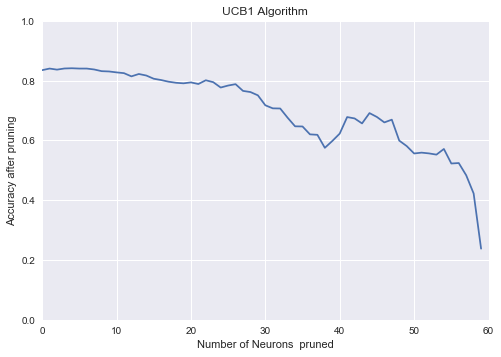

In [10]:
algo = UCB1([], [])
Alg_name = 'UCB1 Algorithm'
path = './UCB1/'
sys.path.append("./UCB1")
exec(open("mnist_cnnFORTESTING.py").read())

# Compare the accuracy

In [11]:
ucb1 = np.load('./UCB1/AccuracyAftrerPrune.npy')
ThompsonSampling = np.load('./Thompson_Sampling/AccuracyAftrerPrune.npy')
Accuracy = np.load('AccuracyBeforePruning.npy')

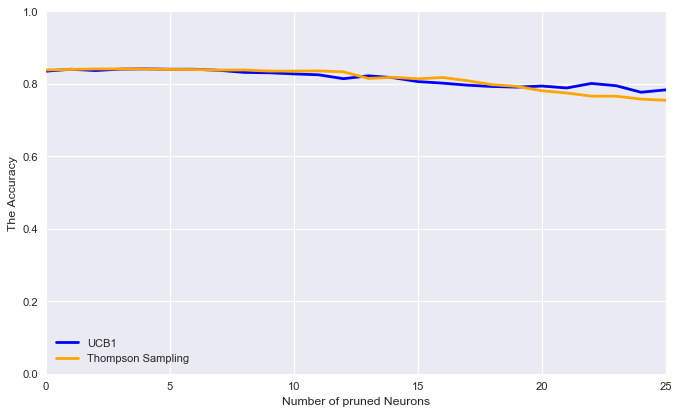

In [12]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
plt.legend(loc = 3)
plt.axis([0, 25, 0, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [13]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
p1.line(ind, ucb1, legend="ucb1", line_color="blue", line_width=2)
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="red", line_width=2)
p1.title.align = "center"
show(p1)

# Comparing All algorithms with the model before pruning

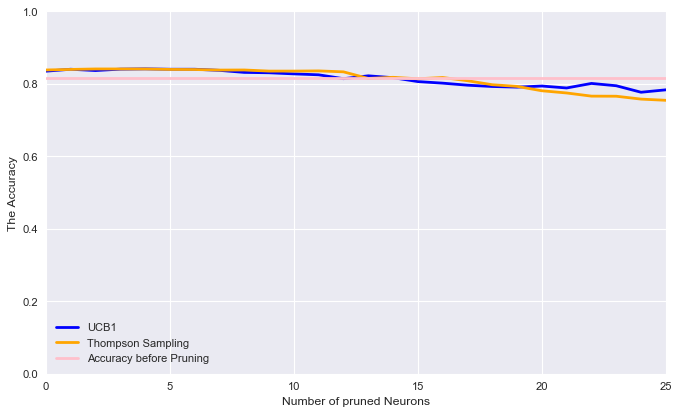

In [14]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
Acc = [Accuracy for col in range(N)]
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
plt.legend(loc = 3)
plt.axis([0, 25, 0, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [15]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
p1.line(ind, ucb1, legend="ucb1", line_color="green", line_width=2)
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="red", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="blue", line_width=2)
p1.title.align = "center"
show(p1)